In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Extended Patient Dataset
data = {
    'Patient_ID': list(range(101, 121)),
    'Age':       [29, 45, 34, 50, 41, 50, 38, 32, 60, 43, 36, 55, 48, 31, 47, 53, 39, 44, 40, 52],
    'Heart_Rate':[78, 85, 90, 88, 82, 80, 76, 74, 65, 89, 83, 70, 77, 92, 79, 67, 84, 81, 86, 75],
    'Cholesterol':[190, 220, 210, 240, 210, 200, 230, 180, 260, 215, 195, 205, 198, 175, 199, 245, 185, 208, 212, 225],
    'Diagnosis': [
        'Diabetes', 'Hypertension', 'Asthma', 'Diabetes', 'Heart Disease',
        'Hypertension', 'Hypertension', 'Diabetes', 'Diabetes', 'Asthma',
        'Hypertension', 'Diabetes', 'Heart Disease', 'Asthma', 'Diabetes',
        'Heart Disease', 'Asthma', 'Diabetes', 'Diabetes', 'Hypertension'
    ]
}

df = pd.DataFrame(data)

In [4]:
# Create target column: 1 if Diagnosis is Diabetes, else 0
df['Diabetes'] = df['Diagnosis'].apply(lambda x: 1 if x == 'Diabetes' else 0)

In [5]:

# Keep only rows where we have no missing values for Age and Cholesterol
df_clean = df[['Age', 'Cholesterol', 'Diabetes']].dropna()

In [12]:

# Features and target
X = df_clean[['Age', 'Cholesterol']]
y = df_clean['Diabetes']

In [7]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [9]:
# Predict
y_pred = logreg.predict(X_test)

In [10]:
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2 1]
 [2 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.50      0.33      0.40         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



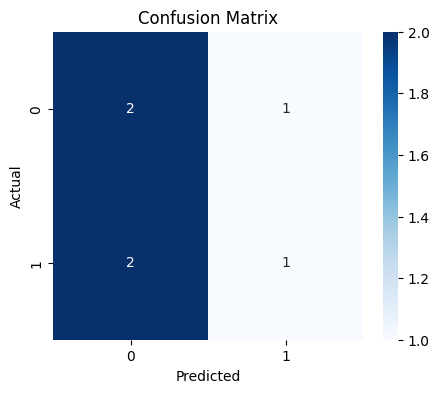

In [11]:

# Optional: Heatmap of confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()